In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
import numpy as np
import hmvec as hm
import matplotlib.pyplot as plt
import matplotlib

In [3]:
#Plot settings
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 'xx-large'
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['axes.titlesize'] = 'xx-large'

## Setting Up

First, we setup our grid and initialize our halo model. Since this on a shared node on Cori, the (z,m,k) grid we set up is fairly coarse.

In [4]:
#Setup Grid
Nz = 60                                 # num of redshifts
Nm = 100                                 # num of masses
Nk = 100                                # num of wavenumbers
redshifts = np.linspace(0.01, 7, Nz)             
masses = np.geomspace(1.0e10, 1.0e16, Nm)          
ks = np.geomspace(1.0e-3, 100.0, Nk)              # wavenumbers
ells = np.linspace(10, 10000, 200)

In [5]:
#Initialize Halo Model 
hcos = hm.HaloModel(redshifts,ks,ms=masses,mass_function='tinker',params={'As':2.4667392631170437e-09,'ns':.96,'omch2':(0.25-.043)*.7**2,'ombh2':0.044*.7**2,'H0':70.},mdef='mean')

Next, set up the parameters for the CIB model we want. We'll be using Planck 2013 values. We can also give different parameter values (e.g. a dictionary of new values for some/all of the parameters); see 'set_cibParams' documentation for details.

In [6]:
#Set CIB Parameters
hcos.set_cibParams('planck13')

## Frequencies

We need to create a 2x2 array of frequencies. The first axis contains the frequencies to be auto/cross-correlated. The second axis contains the endpoints of a range of frequencies (as in a bandpass).

If you can provide a 1D array containing a single frequency/bandpass, it will assume you want an autocorrelation.

In [7]:
#Autocorrelation: 1 Freq
autofreq = np.array([545], dtype=np.double)   *1e9    #Ghz

#Autocorrelation: Bandpass
autoband = np.array([540, 550], dtype=np.double)           #Ghz

#Cross-Correlation: 1 Freq
crossfreq = np.array([[545],[353]], dtype=np.double)   #Ghz

#Cross-Correlation: Bandpass
crossband = np.array([[540, 550],[347, 359]], dtype=np.double)   #Ghz

Let's just stick with a single frequency autocorrelation for now.

## Calculations

In [8]:
#Get 3D Power Spectra P(z,k)
Pjj_tot = hcos.get_power("cib", "cib", nu_obs=autofreq)  
Pjj_1h = hcos.get_power_1halo("cib", "cib", nu_obs=autofreq)  
Pjj_2h = hcos.get_power_2halo("cib", "cib", nu_obs=autofreq)  
Pjj_cen = hcos.get_power("cib", "cib", nu_obs=autofreq, subhalos=False)  # no satellites

Two-halo consistency1:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [[1.29643995e+17 1.29643990e+17 1.29643984e+17 ... 1.07747268e+15
  8.80944366e+14 7.16679662e+14]
 [2.79813325e+17 2.79813315e+17 2.79813303e+17 ... 2.15947751e+15
  1.76075181e+15 1.42823142e+15]
 [5.51679071e+17 5.51679053e+17 5.51679030e+17 ... 4.03075362e+15
  3.27915701e+15 2.65348734e+15]
 ...
 [3.94127839e+19 3.94127839e+19 3.94127838e+19 ... 1.12214408e+18
  9.03881917e+17 7.26096725e+17]
 [3.59053163e+19 3.59053162e+19 3.59053162e+19 ... 1.05146388e+18
  8.47156341e+17 6.80637435e+17]
 [3.26387570e+19 3.26387570e+19 3.26387570e+19 ... 9.82836421e+17
  7.92070868e+17 6.36487032e+17]]
Two-halo consis

In [9]:
#Limber Integrals
C_tot, dcdz_tot = hcos.C_ii(ells, redshifts, ks, Pjj_tot, dcdzflag=True)
C_1h, dcdz_1h = hcos.C_ii(ells, redshifts, ks, Pjj_1h, dcdzflag=True)
C_2h, dcdz_2h = hcos.C_ii(ells, redshifts, ks, Pjj_2h, dcdzflag=True)
C_cen, dcdz_cen = hcos.C_ii(ells, redshifts, ks, Pjj_cen, dcdzflag=True)

## Plots

Let's first look at the $C$'s with the centrals and the satellites.

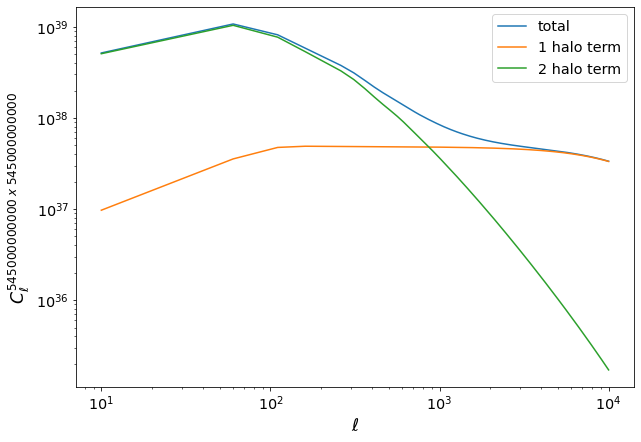

In [10]:
plt.figure(figsize=(10,7))

#Plot C's
plt.loglog(ells, C_tot, label='total')
plt.loglog(ells, C_1h, label='1 halo term')
plt.loglog(ells, C_2h, label='2 halo term')

#Gravy
plt.xlabel(r'$\ell$')
plt.ylabel(rf'$C^{{ {autofreq[0]:0.0f} \;x\; {autofreq[0]:0.0f} }}_\ell$')
plt.legend();

Now let's see the total $C$ without any satellites. Note the difference in the magnitude of the power with and without the satellites. The units are not established yet.

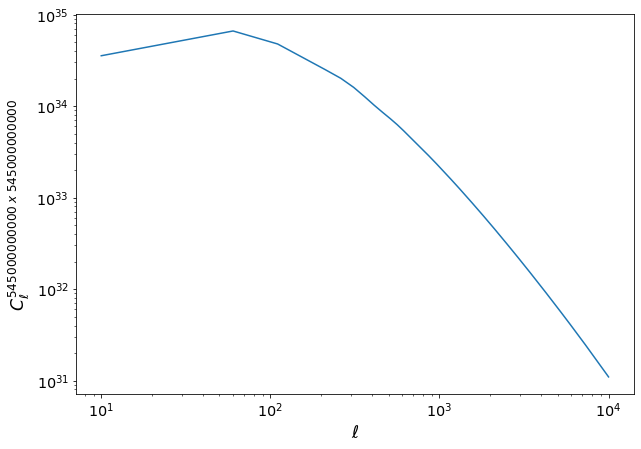

In [11]:
plt.figure(figsize=(10, 7))

#Plot C without Satellites
plt.loglog(ells, C_cen)

#Gravy
plt.xlabel(r'$\ell$')
plt.ylabel(rf'$C^{{ {autofreq[0]:0.0f} \;x\; {autofreq[0]:0.0f} }}_\ell$');

Now let's look at $dC/dz$ with the satellites.

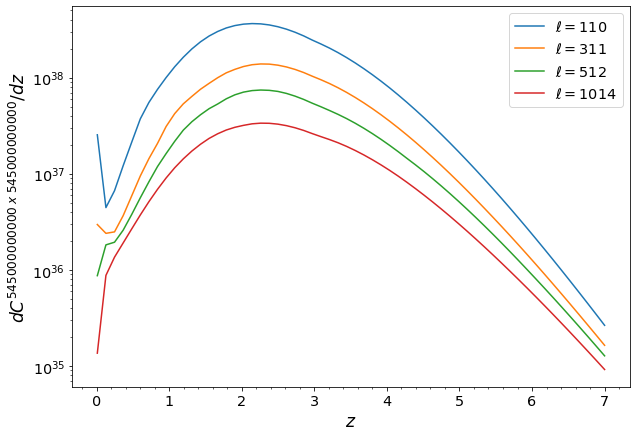

In [12]:
#Plot dC/dz With Satelli tes
test_ells = np.array([100, 300, 500, 1000])
plt.figure(figsize=(10,7))
for ell in test_ells:
    #Get index
    i = np.where(ells>=ell)[0][0]
    #Spectra
    plt.semilogy(redshifts, dcdz_tot[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.ylabel(rf'$dC^{{ {autofreq[0]:0.0f} \;x\; {autofreq[0]:0.0f} }} / dz$')
    plt.legend()
    plt.minorticks_on();

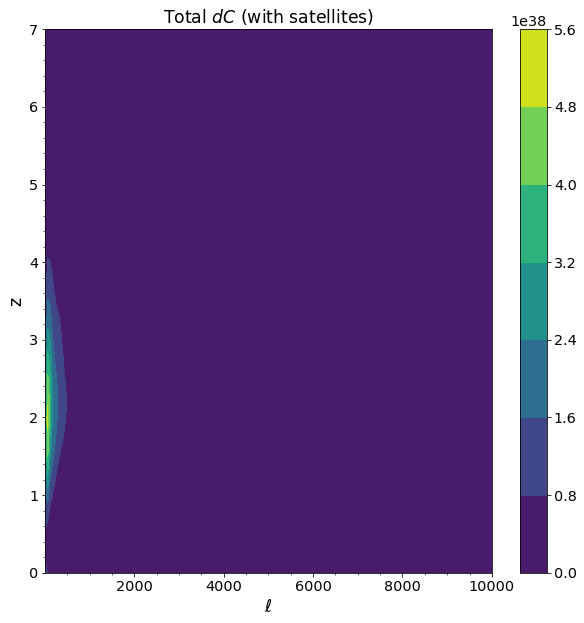

In [13]:
#Setup
plt.figure(figsize=(10,10))

#Plots
plt.contourf(ells, redshifts, dcdz_tot)

#Gravy
plt.colorbar()
plt.xlabel(r'$\ell$')
plt.ylabel('z')
plt.title(r'Total $dC$ (with satellites)')

#Ticks
ax = plt.gca()
ax.set_yticks(np.arange(0,8))
plt.minorticks_on();

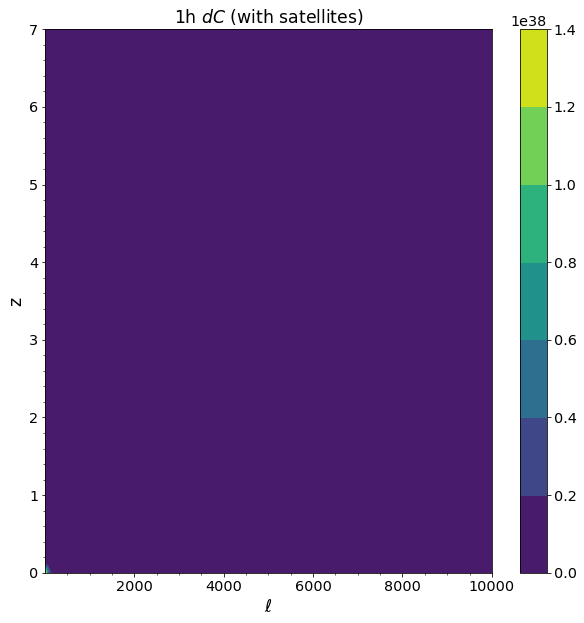

In [14]:
#Setup
plt.figure(figsize=(10,10))

#Plots
plt.contourf(ells, redshifts, dcdz_1h)

#Gravy
plt.colorbar()
plt.xlabel(r'$\ell$')
plt.ylabel('z')
plt.title(r'1h $dC$ (with satellites)')

#Ticks
ax = plt.gca()
ax.set_yticks(np.arange(0,8))
plt.minorticks_on();

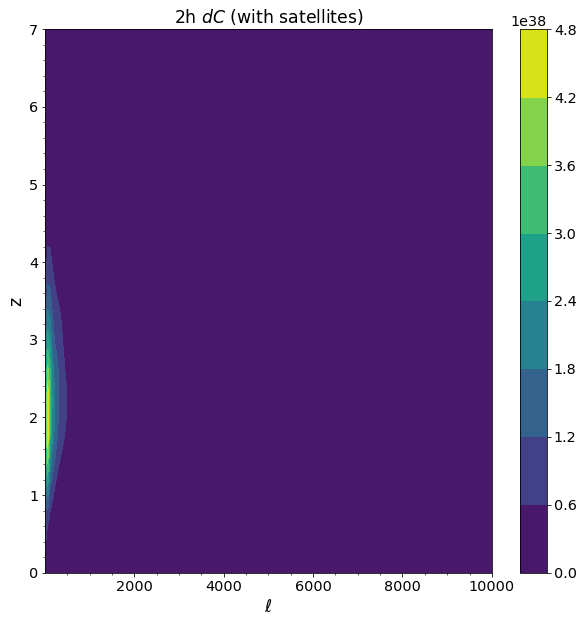

In [15]:
#Setup
plt.figure(figsize=(10,10))

#Plots
plt.contourf(ells, redshifts, dcdz_2h)

#Gravy
plt.colorbar()
plt.xlabel(r'$\ell$')
plt.ylabel('z')
plt.title(r'2h $dC$ (with satellites)')

#Ticks
ax = plt.gca()
ax.set_yticks(np.arange(0,8))
plt.minorticks_on();

And $dC/dz$ without the satellites.

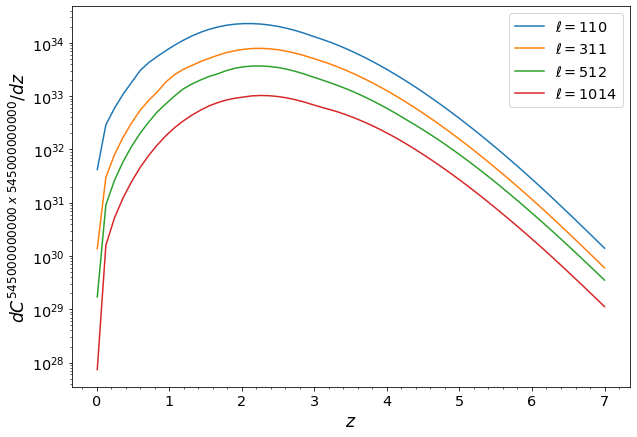

In [16]:
#Plot dC/dz With Satellites
test_ells = np.array([100, 300, 500, 1000])
plt.figure(figsize=(10,7))
for ell in test_ells:
    #Get index
    i = np.where(ells>=ell)[0][0]

    #Spectra
    plt.semilogy(redshifts, dcdz_cen[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.ylabel(rf'$dC^{{ {autofreq[0]:0.0f} \;x\; {autofreq[0]:0.0f} }} / dz$')
    plt.legend()
    plt.minorticks_on();

# Test of tSZ 

In [ ]:

hcos.add_battaglia_pres_profile("y",family="pres",xmax=5.,nxs=30000)

Pyy = hcos.get_power("y","y",verbose=False)
ells = np.linspace(10,10000,1000)
Cyy = hcos.C_yy(ells,redshifts,ks,Pyy)

In [ ]:
plt.plot(ells,ells**2*Cyy*hm.default_params['T_CMB']**2/2./np.pi)#*hm.default_params['T_CMB']**2
# plt.yscale('log') 
plt.xlim([200,3000])
plt.xlabel('$\ell$')
plt.ylabel("$C_\ell \ell^2/(2 \pi)$")



